# **Assignment 1: Kaggle Competition**



## Kaggle Competition: NBA Career Prediction

In the National Basketball Association (NBA), a rookie is any player who has never played a game in the NBA until that year. At the end of the season the NBA awards the best rookie with the NBA Rookie of the Year Award.

Moving to the NBA league is a big deal for any basketball player. Sports commentators and fans are very excited to follow the start of their careers and guess how they will perform in the future.

You are tasked to build a model that will predict if a rookie player will last at least five years in the league based on his stats.

The metric used to assess model performance is AUROC (Area Under ROC).

The steps are:
1.   Setup Repository
2.   Load and Explore Dataset
3.   Prepare Data
4.   Split Dataset
5.   Baseline Model
6.   Push Changes


### 1. Setup Repository

**[1.1]** Go to a folder of your choice on your computer (where you store projects)

In [ ]:
# Go to a folder of your choice on your computer (where you store projects
cd ~/UTS/

**[1.2]** Copy the cookiecutter data science template

In [ ]:
cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

Follow the prompt (name the project and repo adv_dsi)

**[1.3]** Go inside the created folder `adv_dsi_lab_2`

In [ ]:
cd adv_dsi

**[1.4]** Initialise the repo

In [ ]:
git init
git add --all
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/bonhxh/adv_dsi.git
git push -u origin main

**[1.9]** Create a new git branch called `data_prep`

In [ ]:
git checkout -b data_prep

**[1.10]** Download the dataset into the folder data/raw

**[1.11]** Navigate the folder `notebooks` and create a new jupyter notebook called `bonheur_sorn-49371-week1_nba_prediction.ipynb`

**[1.12]** Install requirements

In [ ]:
pip install -r requirements.txt

**[1.13]** Imports

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

warnings.filterwarnings("ignore")

import os, sys
cwd = os.getcwd()
sys.path.append(os.path.join(cwd, "../"))

from src.data.sets import save_sets
from src.models.performance import print_reg_perf, plot_cf

### 2.   Load and Explore Dataset

**[2.1]** Load the dataset into dataframe called df

In [32]:
df_train_name = "NBA_train"
df_test_name = "NBA_test"

df_train = pd.read_csv(f"../data/raw/{df_train_name}.csv")
df_test = pd.read_csv(f"../data/raw/{df_test_name}.csv")

**[2.2]** Display the first 5 rows of df

In [11]:
df_train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


**[2.3]** Display the dimensions (shape) of df

In [12]:
df_train.shape

(8000, 21)

**[2.4]** Display the summary (info) of df

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

**[2.5]** Display the descriptive statistics of df


In [14]:
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


### 3. Prepare Data

**[3.1]** Exploratory Data Analysis (EDA)

Generate data profile

In [15]:
profile = ProfileReport(df_train)

Save to file

In [16]:
profile.to_file(f"../reports/{df_train_name}-profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**[3.2]** Create a copy of df and save it into a variable called df_cleaned

In [17]:
df_cleaned = df_train.copy()

**[3.3]** Save the dataframe in the `/data/interim` folder

In [18]:
df_cleaned.to_csv(f'../data/interim/{df_train_name}.csv', index=False)

### 4. Split Dataset

**[4.1]** Split the data into several sets

In [5]:
transformed_df = df_cleaned.copy()
X = transformed_df.drop('TARGET_5Yrs', axis=1)
y = transformed_df['TARGET_5Yrs']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

**[4.2]** Save the different sets locally with numpy into the folder `data/processed`

In [8]:
save_sets(X_train, y_train, X_test, y_test, path='../data/processed/')

### 5. Baseline Model

**[5.1]** Calculate the average of the target variable for the training set and save it into a variable called `y_mean`

In [9]:
y_mean = y_train.mean()

**[5.2]** Create a numpy array called `y_base` of dimensions (len(y_train), 1) filled with this value

In [10]:
y_base = np.full((len(y_train), 1), y_mean)

**[5.3]** Display the RMSE and MAE scores of this baseline model

In [13]:
print_reg_perf(y_preds=y_base, y_actuals=y_train, set_name='Training')

RMSE Training: 0.3726779962499649
MAE Training: 0.27777777777777773


### 6. Train Logical Regression

In [7]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [8]:
print("Train:", lr.score(X_train, y_train))
print("Test:", lr.score(X_test, y_test))

lr_y_preds_train = lr.predict(X_train)
print(classification_report(y_train, lr_y_preds_train, target_names=['major', 'minor']))

lr_y_preds_test = lr.predict(X_test)
print(classification_report(y_test, lr_y_preds_test, target_names=['major', 'minor']))

Train: 0.8348333333333333
Test: 0.8325
              precision    recall  f1-score   support

       major       0.66      0.02      0.04      1000
       minor       0.84      1.00      0.91      5000

    accuracy                           0.83      6000
   macro avg       0.75      0.51      0.47      6000
weighted avg       0.81      0.83      0.76      6000

              precision    recall  f1-score   support

       major       0.17      0.00      0.01       331
       minor       0.83      1.00      0.91      1669

    accuracy                           0.83      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.72      0.83      0.76      2000



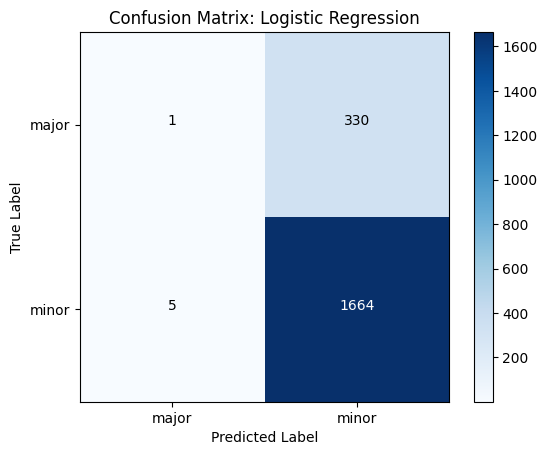

In [9]:
plot_cf(y_test, lr_y_preds_test, model_name='Logistic Regression', class_names=['major', 'minor'])

Predict with test set `NBA_test`

In [33]:
df = df_test.copy()
X_val = df
lr_y_preds_val = lr.predict(X_val)

In [36]:
df["TARGET_5Yrs"] = lr_y_preds_val
df = df[["Id", "TARGET_5Yrs"]]

Save predictions to CSV

In [37]:
df.to_csv(f'../models/lr_{df_test_name}.csv', index=False)

### 6.   Push changes

**[6.1]** Add you changes to git staging area

In [ ]:
git add --all

**[6.2]** Create the snapshot of your repository and add a description

In [ ]:
git commit -m "Save predictions"

**[6.3]** Push your snapshot to Github

In [ ]:
git push --set-upstream origin data_prep

**[6.4]** Go to Github and merge the branch after reviewing the code and fixing any conflict


